```{image} ../images/logos/Xarray_Logo_RGB_Final.png
:width: 250px
:align: center
```

# Introducción a Xarray
---

`Xarray` es una librería de Python diseñada para facilitar el análisis y manipulación de **datos multidimensionales etiquetados** (como los que provienen de modelos climáticos, observaciones satelitales o simulaciones numéricas).

Inspirado en la estructura de `Pandas`, `Xarray` extiende su funcionalidad a arreglos N-dimensionales, permitiendo trabajar de forma intuitiva con datos que tienen múltiples coordenadas como **tiempo**, **latitud** y **longitud**.

> Xarray es especialmente popular en ciencias de la Tierra y del clima, donde los datos suelen venir en formatos como **NetCDF**, **Zarr** o **GRIB**.


## 📚 ¿Qué vas a aprender?

Al completar este cuadernillo serás capaz de:

- Comprender qué son `DataArray` y `Dataset`
- Crear objetos Xarray desde arreglos de NumPy
- Asignar dimensiones y coordenadas
- Explorar y seleccionar datos usando coordenadas
- Calcular estadísticas y aplicar operaciones
- Visualizar datos con `.plot()`
- Leer datos reales desde archivos NetCDF


## ✅ Requisitos previos

| Concepto | Importancia | Notas |
| --- | --- | --- |
| [Introducción a NumPy](./1.2Numpy-Pandas-Xarray.ipynb) | Necesario | Arreglos multidimensionales |
| [Fundamentos de Pandas](./1.2Numpy-Pandas-Xarray.ipynb) | Necesario | Indexado y manipulación tabular |
| [Uso de JupyterLab](./1.1Fundamentos-python.ipynb) | Útil | Navegación entre celdas |

⏱️ **Tiempo estimado de aprendizaje**: 20–25 minutos  
✍️ **Formato**: interactivo, ejecuta y modifica el código a medida que avanzas

## 1. Primeros pasos con Xarray 🧪
---

La unidad básica en Xarray es el **`DataArray`**, que extiende la funcionalidad de los `ndarray` de NumPy. A diferencia de NumPy, Xarray permite asignar:

- **Dimensiones con nombre** (`time`, `lat`, `lon`, etc.)
- **Coordenadas** con etiquetas asociadas
- **Atributos** descriptivos como unidades, nombre estándar, etc.

Esta herramienta es particularmente poderosa cuando se trabaja con datos atmosféricos, oceanográficos o climáticos provenientes de modelos numéricos o sensores remotos, donde las variables dependen del tiempo, la latitud, la longitud y a veces también de la altitud.

Importemos las librerias necesarias para este cuadernillo

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

### 🎛️ 1.1. Crear un `DataArray` desde NumPy

Para comenzar, creamos una matriz tridimensional con valores simulados de temperatura (en grados Kelvin). Esta matriz tendrá dimensiones que representan el tiempo, la latitud y la longitud:


In [2]:
data = 283 + 5 * np.random.randn(5, 3, 4)  # 5 tiempos, 3 latitudes, 4 longitudes
data.shape

(5, 3, 4)

Podemos construir un `DataArray` inicial directamente desde este arreglo de NumPy, aunque sin información adicional aún:

In [3]:
temp = xr.DataArray(data)
temp

<xarray.DataArray (dim_0: 5, dim_1: 3, dim_2: 4)> Size: 480B
array([[[277.7209287 , 283.91817929, 281.57156749, 282.87738489],
        [281.27990362, 276.48555645, 293.86160707, 280.45745589],
        [284.83178539, 278.74057296, 288.5941594 , 283.7942554 ]],

       [[283.64278561, 286.74261531, 285.00695613, 278.61513841],
        [280.31273058, 281.27604641, 283.44131729, 280.41990154],
        [298.6090136 , 276.75194796, 276.61290961, 277.02612567]],

       [[281.30033086, 284.43744335, 290.14980402, 283.63983366],
        [281.80801914, 280.09916449, 273.28079309, 276.54468679],
        [280.72396158, 286.11213995, 284.10705037, 283.47674113]],

       [[277.31021704, 289.86247695, 283.69187281, 283.29127753],
        [282.56702535, 285.34330973, 284.1983761 , 275.85692386],
        [276.43600779, 271.9134582 , 289.48358031, 285.9877262 ]],

       [[278.98995111, 278.12112252, 284.47331669, 273.14492763],
        [282.55375943, 281.29298877, 284.09744892, 280.70001689],
        [283.69017902, 287.11462993, 291.55801328, 283.84416414]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

⚠️ Como no definimos nombres para las dimensiones, Xarray usa nombres genéricos como `dim_0`, `dim_1`, `dim_2`, lo cual puede dificultar la interpretación de los datos.

### 1.2 Asignar nombres de dimensiones 📀

Para mejorar la legibilidad, asignamos nombres explícitos a las dimensiones. Esto convierte un arreglo anónimo en un conjunto de datos más descriptivo y navegable:

In [4]:
temp = xr.DataArray(data, dims=["time", "lat", "lon"])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)> Size: 480B
array([[[277.7209287 , 283.91817929, 281.57156749, 282.87738489],
        [281.27990362, 276.48555645, 293.86160707, 280.45745589],
        [284.83178539, 278.74057296, 288.5941594 , 283.7942554 ]],

       [[283.64278561, 286.74261531, 285.00695613, 278.61513841],
        [280.31273058, 281.27604641, 283.44131729, 280.41990154],
        [298.6090136 , 276.75194796, 276.61290961, 277.02612567]],

       [[281.30033086, 284.43744335, 290.14980402, 283.63983366],
        [281.80801914, 280.09916449, 273.28079309, 276.54468679],
        [280.72396158, 286.11213995, 284.10705037, 283.47674113]],

       [[277.31021704, 289.86247695, 283.69187281, 283.29127753],
        [282.56702535, 285.34330973, 284.1983761 , 275.85692386],
        [276.43600779, 271.9134582 , 289.48358031, 285.9877262 ]],

       [[278.98995111, 278.12112252, 284.47331669, 273.14492763],
        [282.55375943, 281.29298877, 284.09744892, 280.70001689],
        [283.69017902, 287.11462993, 291.55801328, 283.84416414]]])
Dimensions without coordinates: time, lat, lon

Creamos un objeto con datos y dimensiones que gráficamente se podría representar de la siguiente manera:

<img src="../images/datarray.png" width=600 alt="Datarray"></img> 

Esto nos permite realizar operaciones sobre dimensiones por nombre, en lugar de índices numéricos.

### 1.3 Agregar coordenadas a las dimensiones 🗺️

Además de los nombres, podemos asociar coordenadas reales que representen valores geográficos o temporales. Esto permite, por ejemplo, ubicar espacialmente los datos o hacer filtrados temporales:

In [5]:
times = pd.date_range("2018-01-01", periods=5)
lats = np.linspace(25, 55, 3)
lons = np.linspace(-120, -90, 4)

Construimos nuevamente el `DataArray`, esta vez incluyendo coordenadas:

In [6]:
temp = xr.DataArray(data, coords=[times, lats, lons], dims=["time", "lat", "lon"])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)> Size: 480B
array([[[277.7209287 , 283.91817929, 281.57156749, 282.87738489],
        [281.27990362, 276.48555645, 293.86160707, 280.45745589],
        [284.83178539, 278.74057296, 288.5941594 , 283.7942554 ]],

       [[283.64278561, 286.74261531, 285.00695613, 278.61513841],
        [280.31273058, 281.27604641, 283.44131729, 280.41990154],
        [298.6090136 , 276.75194796, 276.61290961, 277.02612567]],

       [[281.30033086, 284.43744335, 290.14980402, 283.63983366],
        [281.80801914, 280.09916449, 273.28079309, 276.54468679],
        [280.72396158, 286.11213995, 284.10705037, 283.47674113]],

       [[277.31021704, 289.86247695, 283.69187281, 283.29127753],
        [282.56702535, 285.34330973, 284.1983761 , 275.85692386],
        [276.43600779, 271.9134582 , 289.48358031, 285.9877262 ]],

       [[278.98995111, 278.12112252, 284.47331669, 273.14492763],
        [282.55375943, 281.29298877, 284.09744892, 280.70001689],
        [283.69017902, 287.11462993, 291.55801328, 283.84416414]]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 24B 25.0 40.0 55.0
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0

Con esto obtenemos un objeto con visualización enriquecida: las dimensiones están etiquetadas y cada punto tiene una referencia espacial y temporal clara.

<img src="../images/datarray_coords.png" width=600 alt="Datarray_Coords"></img> 

### 1.4 Agregar atributos descriptivos 🏷️

Finalmente, Xarray permite incluir metadatos como unidades físicas, nombres estándar de variables o descripciones adicionales. Esto es importante para la trazabilidad y para facilitar el trabajo colaborativo o la publicación de datos:


In [7]:
temp.attrs["units"] = "K"
temp.attrs["standard_name"] = "air_temperature"

Estos atributos no alteran los datos, pero se usan al exportar, graficar o convertir los objetos a otros formatos como netCDF. También ayudan a los usuarios a entender rápidamente qué representa el conjunto de datos.


## 2. Dataset: Contenedor multidimensional 🧳
---
Mientras que un `DataArray` representa una sola variable con sus dimensiones y coordenadas, un `Dataset` es un **contenedor que puede almacenar múltiples `DataArray`s**, que posiblemente compartan dimensiones y coordenadas.

Esto es muy útil en ciencias ambientales, donde queremos trabajar simultáneamente con variables como temperatura, presión, humedad, etc., dentro de un mismo archivo o conjunto de datos.


### 2.1 Crear múltiples DataArrays 🌡️

Partimos de los `DataArray`s que representan distintas variables físicas como temperatura del aire, presión atmosférica y humedad relativa:


In [8]:
# Temperatura
temp = xr.DataArray(
    data=283 + 5 * np.random.randn(5, 3, 4),
    coords={"time": times, "lat": lats, "lon": lons},
    dims=["time", "lat", "lon"],
    name="Temperature",
    attrs={"units": "K", "standard_name": "air_temperature"}
)

# Presión
pressure = xr.DataArray(
    data=1000 + 10 * np.random.randn(5, 3, 4),
    coords={"time": times, "lat": lats, "lon": lons},
    dims=["time", "lat", "lon"],
    name="Pressure",
    attrs={"units": "hPa", "standard_name": "air_pressure"}
)

# Humedad relativa
hr = xr.DataArray(
    data=np.random.uniform(60, 100, size=5),
    coords={"time": times},
    dims=["time"],
    name="RelativeHumidity",
    attrs={"units": "%", "standard_name": "relative_humidity"}
)

### 2.2 Crear el Dataset 📦

Una vez definidos los `DataArray`s, podemos crear un `Dataset` pasando un diccionario con las variables:

In [9]:
ds = xr.Dataset(
    data_vars={
        "Temperature": temp,
        "Pressure": pressure,
        "RelativeHumidity": hr
    }
)

En un entorno interactivo como JupyterLab, este `Dataset` se mostrará como una menu desplegable que incluye:
- Dimensiones (`dims`)
- Coordenadas (`coords`)
- Variables (`data_vars`)
- índices (`indexes`)
- Atributos (`attrs`)

In [10]:
ds

<xarray.Dataset> Size: 1kB
Dimensions:           (time: 5, lat: 3, lon: 4)
Coordinates:
  * time              (time) datetime64[ns] 40B 2018-01-01 ... 2018-01-05
  * lat               (lat) float64 24B 25.0 40.0 55.0
  * lon               (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Data variables:
    Temperature       (time, lat, lon) float64 480B 288.6 280.1 ... 280.3 282.0
    Pressure          (time, lat, lon) float64 480B 1.001e+03 ... 1.003e+03
    RelativeHumidity  (time) float64 40B 77.86 88.51 96.36 63.7 73.14

La visualización del `Dataset` mostrará las dimensiones compartidas, las coordenadas y un resumen de cada variable contenida como se muestra en la siguiente imagen tomada de la documentación de `xarray`

<img src="../images/xarray-datastructure.png" width=800 alt="Dataset"></img> 

Esto permite acceder rápidamente a las dimensiones comunes y explorar todas las variables de forma estructurada.


## 3. Selección de datos y operaciones básicas 🧩
---
Una vez que tenemos nuestros datos organizados en `DataArray` o `Dataset`, Xarray nos permite acceder, filtrar y operar sobre ellos de forma muy intuitiva utilizando etiquetas en lugar de índices numéricos.


### 3.1 Acceder a variables en un Dataset 🔎

Cada variable contenida dentro de un `Dataset` es un `DataArray`, y se puede acceder de manera sencilla usando notacion por atributo `ds.<atributo>` (acceso directo si el nombre es válido) 

In [11]:
ds.Temperature

<xarray.DataArray 'Temperature' (time: 5, lat: 3, lon: 4)> Size: 480B
array([[[288.62830827, 280.1062759 , 282.67360811, 293.40679624],
        [284.34771452, 277.22286581, 279.56519187, 280.49642621],
        [287.50605753, 278.36606204, 284.30631853, 273.74377389]],

       [[286.97554501, 284.09556438, 273.98862517, 282.44376482],
        [284.40776934, 285.40670316, 277.74411393, 284.4374869 ],
        [285.21600592, 275.52314791, 281.75057038, 280.41383204]],

       [[291.5763986 , 282.90670876, 279.47681316, 283.72372501],
        [285.23065269, 280.1392584 , 283.67946476, 281.5003201 ],
        [275.88442921, 275.36180388, 290.80166688, 284.06606204]],

       [[288.11552963, 273.9859412 , 285.00796339, 279.25011294],
        [279.41140559, 291.38305807, 282.07570356, 296.10750104],
        [281.2689177 , 285.96904447, 276.33366308, 290.09049879]],

       [[283.01956541, 286.14158867, 274.14286474, 278.74594048],
        [288.28441652, 288.3866807 , 286.75227202, 288.00522751],
        [284.89027873, 285.70993367, 280.27302009, 281.98450062]]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 24B 25.0 40.0 55.0
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Attributes:
    units:          K
    standard_name:  air_temperature

O Notación por clave de diccionario (más general y flexible)

In [12]:
ds["Pressure"]

<xarray.DataArray 'Pressure' (time: 5, lat: 3, lon: 4)> Size: 480B
array([[[1001.44171727,  992.94105897, 1002.12731365, 1011.7052936 ],
        [ 996.48180199, 1001.72643688,  998.00387467,  994.31405964],
        [ 992.75280311,  998.14884466,  983.75555222, 1007.38978578]],

       [[1007.70858819, 1007.29783358,  995.10519406, 1012.79777318],
        [1001.39591638,  997.74910428, 1000.86667796,  982.73890021],
        [1013.92648372,  996.21507128, 1001.76273877,  997.63896835]],

       [[ 985.82711605, 1003.45107949,  998.62828917, 1009.88941313],
        [ 976.43653457,  990.76394555, 1009.46844324,  997.50768224],
        [ 974.43528792, 1011.04062398,  989.98626159,  977.66647808]],

       [[ 992.28446274, 1003.20570696, 1005.01447373,  989.88474056],
        [1000.80955333,  997.03583393, 1009.38762839, 1008.3004849 ],
        [1000.10840892,  986.80639902,  997.30134556, 1006.54089878]],

       [[ 996.11724097, 1018.65207061, 1005.29890808,  984.52100909],
        [1007.33519412,  990.84934768, 1009.48897282,  987.69017608],
        [ 991.37594902, 1000.76419429, 1001.7536444 , 1003.31483543]]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 24B 25.0 40.0 55.0
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

Ambas formas retornan el `DataArray` correspondiente. La primera es más compacta, útil en notebooks interactivos; la segunda es más robusta, especialmente si los nombres contienen espacios, guiones u otros caracteres especiales.


### 3.2 Seleccionar datos por coordenadas con `.sel()` 🧭

El método `.sel()` permite seleccionar subconjuntos de datos utilizando los **valores de las coordenadas** en lugar de los índices posicionales. Esto hace que el código sea más legible y expresivo.


Por ejemplo, podemos seleccionar todos los datos para una fecha específica


In [13]:
ds.sel(time="2018-01-01")

<xarray.Dataset> Size: 264B
Dimensions:           (lat: 3, lon: 4)
Coordinates:
    time              datetime64[ns] 8B 2018-01-01
  * lat               (lat) float64 24B 25.0 40.0 55.0
  * lon               (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Data variables:
    Temperature       (lat, lon) float64 96B 288.6 280.1 282.7 ... 284.3 273.7
    Pressure          (lat, lon) float64 96B 1.001e+03 992.9 ... 983.8 1.007e+03
    RelativeHumidity  float64 8B 77.86

O seleccionar una variable y una ubicación específica

In [14]:
ds.Temperature.sel(time="2018-01-01", lat=25, lon=-120)

<xarray.DataArray 'Temperature' ()> Size: 8B
array(288.62830827)
Coordinates:
    time     datetime64[ns] 8B 2018-01-01
    lat      float64 8B 25.0
    lon      float64 8B -120.0
Attributes:
    units:          K
    standard_name:  air_temperature


✅ Muy útil y conveniente cuando trabajamos con fechas o ubicaciones reales.

### 3.3 Seleccionar datos por posición con `.isel()` 🔹

Si en cambio queremos seleccionar por posición (como con NumPy), usamos `.isel()`. Esto es útil cuando no conocemos las coordenadas exactas o estamos en procesos de automatización.


In [15]:
# Seleccionar el primer tiempo (posición 0)
ds.isel(time=0)

<xarray.Dataset> Size: 264B
Dimensions:           (lat: 3, lon: 4)
Coordinates:
    time              datetime64[ns] 8B 2018-01-01
  * lat               (lat) float64 24B 25.0 40.0 55.0
  * lon               (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Data variables:
    Temperature       (lat, lon) float64 96B 288.6 280.1 282.7 ... 284.3 273.7
    Pressure          (lat, lon) float64 96B 1.001e+03 992.9 ... 983.8 1.007e+03
    RelativeHumidity  float64 8B 77.86

Seleccionar temperatura para la primera posición de latitud y segunda longitud a lo largo del tiempo

In [16]:
ds.Temperature.isel(lat=0, lon=1)

<xarray.DataArray 'Temperature' (time: 5)> Size: 40B
array([280.1062759 , 284.09556438, 282.90670876, 273.9859412 ,
       286.14158867])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
    lat      float64 8B 25.0
    lon      float64 8B -110.0
Attributes:
    units:          K
    standard_name:  air_temperature

🧠 `.isel()` usa números de posición; `.sel()` usa etiquetas de coordenadas.

### 3.4 Seleccionar rangos con `slice()` 🪄

Podemos seleccionar rangos utilizando `slice()`, lo que facilita el trabajo con subconjuntos:


Por ejemplo seleccionemos el subconjunto de datos entre dos fechas

In [17]:
ds.sel(time=slice("2018-01-01", "2018-01-03"))

<xarray.Dataset> Size: 680B
Dimensions:           (time: 3, lat: 3, lon: 4)
Coordinates:
  * time              (time) datetime64[ns] 24B 2018-01-01 2018-01-02 2018-01-03
  * lat               (lat) float64 24B 25.0 40.0 55.0
  * lon               (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Data variables:
    Temperature       (time, lat, lon) float64 288B 288.6 280.1 ... 290.8 284.1
    Pressure          (time, lat, lon) float64 288B 1.001e+03 992.9 ... 977.7
    RelativeHumidity  (time) float64 24B 77.86 88.51 96.36

O subconjunto de latitudes

In [18]:
ds.sel(lat=slice(30, 50))

<xarray.Dataset> Size: 440B
Dimensions:           (time: 5, lat: 1, lon: 4)
Coordinates:
  * time              (time) datetime64[ns] 40B 2018-01-01 ... 2018-01-05
  * lat               (lat) float64 8B 40.0
  * lon               (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Data variables:
    Temperature       (time, lat, lon) float64 160B 284.3 277.2 ... 286.8 288.0
    Pressure          (time, lat, lon) float64 160B 996.5 1.002e+03 ... 987.7
    RelativeHumidity  (time) float64 40B 77.86 88.51 96.36 63.7 73.14

Esto es especialmente útil en análisis temporales o espaciales que requieren ventanas móviles.

## 4. Operaciones estadísticas y gráficas 📊
---
Una de las grandes ventajas de Xarray es que permite aplicar operaciones estadísticas y crear visualizaciones de forma muy similar a Pandas, pero extendidas a múltiples dimensiones.

### 4.1 Estadísticas sobre dimensiones 📐

Podemos calcular estadísticas como la media, desviación estándar, máximo o mínimo a lo largo de una o varias dimensiones.


In [19]:
# Media de temperatura a lo largo del tiempo
ds.Temperature.mean(dim="time")

<xarray.DataArray 'Temperature' (lat: 3, lon: 4)> Size: 96B
array([[287.66306938, 281.44721578, 279.05797491, 283.5140679 ],
       [284.33639173, 284.50771323, 281.96334923, 286.10939235],
       [282.95313782, 280.18599839, 282.69304779, 282.05973348]])
Coordinates:
  * lat      (lat) float64 24B 25.0 40.0 55.0
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0

In [20]:
# Mínimo de presión sobre latitudes
ds.Pressure.min(dim="lat")

<xarray.DataArray 'Pressure' (time: 5, lon: 4)> Size: 160B
array([[ 992.75280311,  992.94105897,  983.75555222,  994.31405964],
       [1001.39591638,  996.21507128,  995.10519406,  982.73890021],
       [ 974.43528792,  990.76394555,  989.98626159,  977.66647808],
       [ 992.28446274,  986.80639902,  997.30134556,  989.88474056],
       [ 991.37594902,  990.84934768, 1001.7536444 ,  984.52100909]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0

In [21]:
# Desviación estándar de humedad relativa
ds.RelativeHumidity.std(dim="time")

<xarray.DataArray 'RelativeHumidity' ()> Size: 8B
array(11.46833301)

✅ Estas funciones son muy útiles para obtener resúmenes climatológicos o patrones promedios.


4.2 Interpolación de datos 🌐
Cuando necesitas obtener valores en coordenadas que no existen exactamente en tus datos, puedes usar `.interp()` para interpolar:

In [22]:
# Interpolación espacial
valor_interp = ds.Temperature.interp(lat=33.5, lon=-110)
valor_interp

<xarray.DataArray 'Temperature' (time: 5)> Size: 40B
array([278.47234352, 284.83854302, 281.33848689, 283.84430742,
       287.41380749])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
    lat      float64 8B 33.5
    lon      int64 8B -110
Attributes:
    units:          K
    standard_name:  air_temperature

📌 Puedes especificar el método de interpolación (como linear, nearest) y ajustar la tolerancia.

### 4.3 Visualizaciones rápidas con `.plot()` 🖼️

Xarray incluye integración con Matplotlib para hacer gráficos rápidos desde cualquier `DataArray`:

Generemos una serie temporal de temperatura en una ubicación determinada

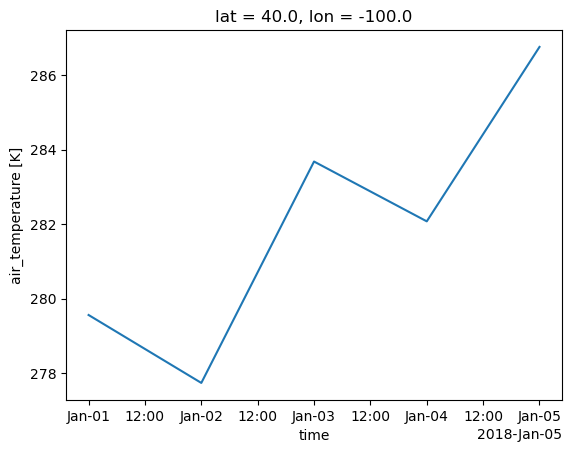

In [23]:
serie = ds.Temperature.sel(lat=40, lon=-100, method="nearest")
serie.plot()

O un mapa de temperatura para t=0

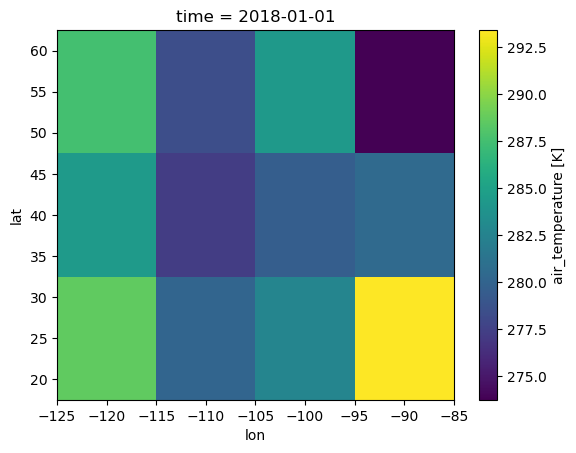

In [24]:
mapa = ds.Temperature.isel(time=0)
mapa.plot()

O un Mapa de temperatura promedio

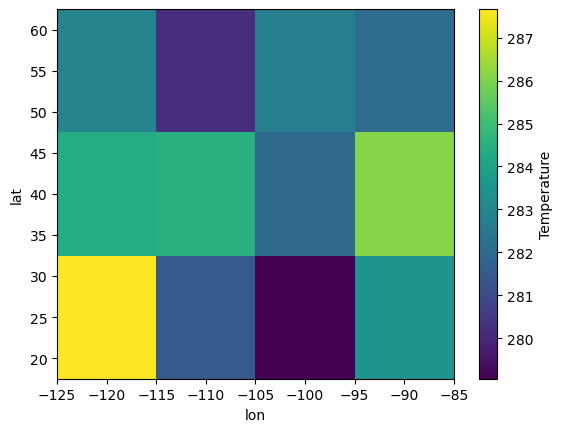

In [25]:
prom_mapa = ds.Temperature.mean("time")
prom_mapa.plot()

🔍 Estas funciones detectan automáticamente si el resultado es 1D o 2D y generan una línea o un mapa respectivamente.


### 4.4 Aplicar máscaras y condiciones 🎭

Puedes aplicar filtros condicionales a los datos usando `.where()`, muy útil para enmascarar regiones o aplicar umbrales:


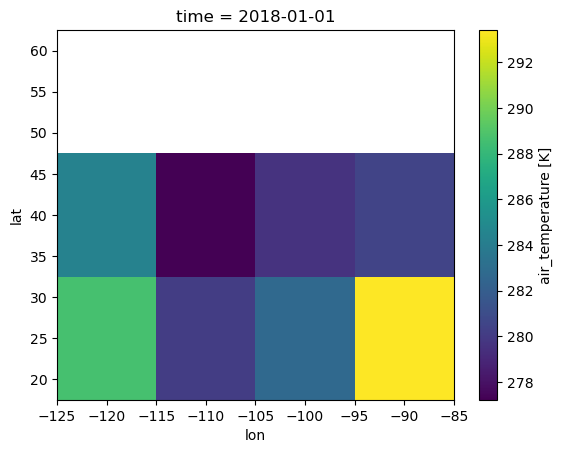

In [26]:
# Mostrar datos para latitudes menores a 50 grados
ds.Temperature.where(ds.lat < 50).isel(time=0).plot()

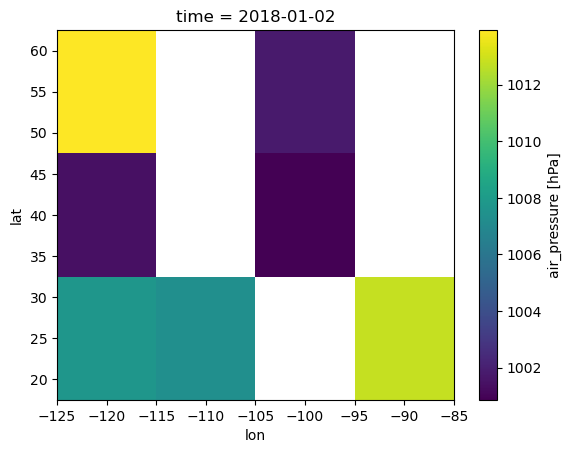

In [27]:
# Filtrar valores de presión mayores a cierto umbral
ds.Pressure.where(ds.Pressure > 1000).isel(time=1).plot()

🧪 `.where()` mantiene la forma del arreglo pero oculta los datos que no cumplen la condición.

## 5. 📂 Lectura de archivos netCDF con Xarray
---
Esta sección te introduciría a cómo cargar datos reales desde archivos científicos en formato netCDF, que es uno de los más comunes en ciencias de la atmósfera, océano y clima.

Los archivos NetCDF (Network Common Data Form) son ampliamente utilizados para almacenar datos multidimensionales del clima, el océano y la atmósfera. Xarray proporciona una forma sencilla y poderosa para leer y explorar este tipo de archivos.


### 5.1 Leer un archivo netCDF

Xarray facilita la lectura de estos archivos con la función `xr.open_dataset()`.

En este ejemplo vamos a usar un archivo real llamado `sst.mnmean.nc`, que contiene datos mensuales de la **temperatura superficial del mar (SST)** a nivel global durante varias décadas. Este tipo de dataset es comúnmente utilizado para analizar fenómenos como El Niño, anomalías de temperatura, o climatologías oceánicas.


In [28]:
path_ncfile = "../data/sst.mnmean.nc"

In [29]:

ds = xr.open_dataset(path_ncfile)

In [30]:
ds

<xarray.Dataset> Size: 131MB
Dimensions:  (lat: 89, lon: 180, time: 2037)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2023-09-01
Data variables:
    sst      (time, lat, lon) float32 131MB ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2023-10-03

### 5.2 Explorar estructura del archivo 🔎

Una vez abierto el Dataset, puedes inspeccionar las variables y dimensiones disponibles:
- Variables contenidas (por ejemplo, `sst` para temperatura superficial del mar)
- Dimensiones como `time`, `lat`, y `lon`
- Coordenadas disponibles y sus unidades
- Atributos globales (fuente, descripción, institución, etc.)

In [31]:
# Visualizar las dimensiones y coordenadas
print(ds.dims)
print(ds.coords)

FrozenMappingWarningOnValuesAccess({'lat': 89, 'lon': 180, 'time': 2037})
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2023-09-01


También puedes ver los atributos generales del archivo:

In [32]:
ds.attrs

{'climatology': 'Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.',
 'description': 'In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'keywords': 'Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature >',
 'instrument': 'Conventional thermometers',
 'source_comment': 'SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker',
 'geospatial_lon_min': np.float32(-1.0),
 'geospatial_lon_max': np.float32(359.0),
 'geospatial_laty_max': np.float32(89.0),
 'geospatial_laty_min': np.float32(-89.0),
 'geospatial_lat_max': np.float32(89.0),
 'geospatial_lat_min': np.float32(-89.0),
 'geospatial_l

### 5.3 Acceder a variables específicas 🧬

Cada variable contenida en el archivo se puede acceder directamente como un `DataArray`.


In [33]:
# Seleccionar la variable de temperatura superficial del mar (sst)
sst = ds['sst']
sst

<xarray.DataArray 'sst' (time: 2037, lat: 89, lon: 180)> Size: 131MB
[32632740 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2023-09-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

Esto mostrará la forma, dimensiones y atributos asociados a la variable.

### 5.4 Visualización básica 🌍

Vamos a generar un mapa de la temperatura para el primer valor temporal del archivo.


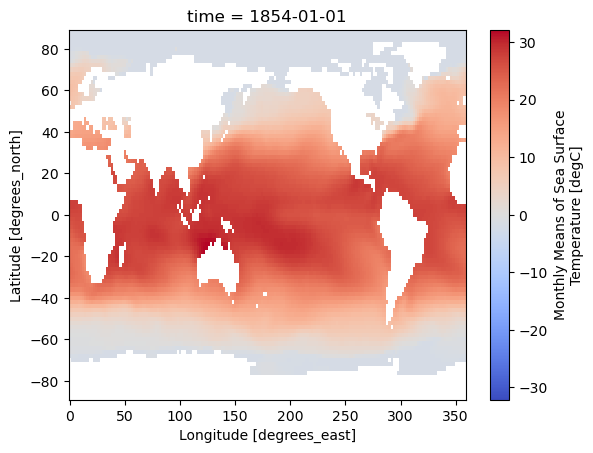

In [34]:
# Graficar la primera capa temporal
sst.isel(time=0).plot(cmap="coolwarm");

🧭 Esto te muestra un mapa global de temperatura superficial del mar para el primer mes disponible en el conjunto de datos.


✅ Puedes cambiar el índice o usar `.sel(time=...)` para seleccionar fechas específicas si el tiempo está en formato calendario.


### 5.5 Operaciones comunes ⚙️

Ya que tenemos un `DataArray`, podemos aplicar operaciones estadísticas o espaciales directamente:


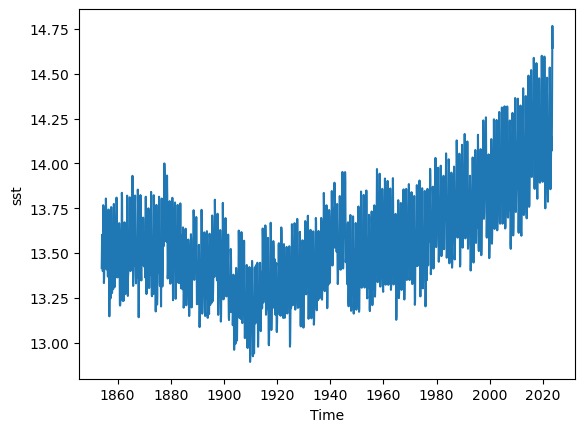

In [35]:
# Temperatura promedio global (promedio espacial)
sst.mean(dim=["lon", "lat"]).plot();

### 5.6 Aplicar máscaras o filtros 🎭

Filtrar solo los valores en el hemisferio sur o para latitudes específicas:


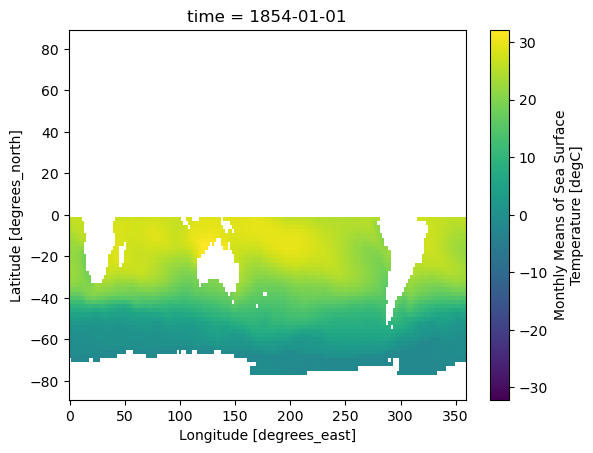

In [36]:
sst.where(sst.lat < 0).isel(time=0).plot(cmap="viridis");

🎉 ¡Con esto completamos nuestra introducción al uso de Xarray con datos reales en formato netCDF!

---

## ✅ Conclusiones

En este cuadernillo aprendiste los fundamentos del manejo de datos multidimensionales con **Xarray**, una herramienta esencial en la ciencia del clima, meteorología y disciplinas relacionadas con datos ambientales.

🔑 **Lo más destacado**:

- Comprendiste la diferencia entre `DataArray` y `Dataset`, dos estructuras clave para manejar datos con múltiples dimensiones y coordenadas.
- Aprendiste a **etiquetar** tus datos con dimensiones y coordenadas que hacen tu análisis más claro y reproducible.
- Aplicaste operaciones estadísticas como `mean()`, `std()` o `sum()` a lo largo de diferentes dimensiones.
- Usaste `.sel()` y `.isel()` para extraer datos fácilmente con etiquetas o índices.
- Generaste visualizaciones rápidas usando `.plot()` para explorar tendencias temporales y mapas espaciales.
- Accediste y exploraste datos reales en formato `netCDF`, el estándar para datos climáticos y atmosféricos.

📦 Con este conocimiento ya puedes comenzar a trabajar con grandes volúmenes de datos científicos como modelos climáticos, observaciones satelitales o reanálisis atmosféricos.

---

## 📚 Recursos recomendados

- [Documentación oficial de Xarray](https://docs.xarray.dev/)
- [Pythia Foundations: Introducción a Xarray](https://foundations.projectpythia.org/core/xarray.html)
- [Earth & Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

---

🎓 ¡Felicitaciones! Estás listo para abordar análisis más complejos con datos multidimensionales usando Xarray.



## Fuentes y Referencias

* Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://doi.org/10.5281/zenodo.7884572